In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Mount Google Drive to access the CSV file
from google.colab import drive
drive.mount('/content/drive')

# Specify the path to your CSV file
csv_path = '/content/drive/MyDrive/NY Airbnb Data/AB_NYC_2019.csv'

# Load the data into a Pandas DataFrame
df = pd.read_csv(csv_path)
print(df.head())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         ro

In [81]:
# Remove rows with prices above 350
df_filtered = df[df['price'] <= 350]
print("Filtered DataFrame:")
print(df_filtered.head())


Filtered DataFrame:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1   

In [82]:
columns_to_remove = ['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'last_review']

#remove the specified columns
df_filtered = df_filtered.drop(columns=columns_to_remove)
df_filtered

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,Brooklyn,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,Manhattan,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [83]:
#cleaning
df_cleaned = df_filtered.fillna(df_filtered.mean())

# Display rows of the cleaned DataFrame
print("Cleaned DataFrame:")
print(df_cleaned.head())


Cleaned DataFrame:
  neighbourhood_group  latitude  longitude        room_type  price  \
0            Brooklyn  40.64749  -73.97237     Private room    149   
1           Manhattan  40.75362  -73.98377  Entire home/apt    225   
2           Manhattan  40.80902  -73.94190     Private room    150   
3            Brooklyn  40.68514  -73.95976  Entire home/apt     89   
4           Manhattan  40.79851  -73.94399  Entire home/apt     80   

   minimum_nights  number_of_reviews  reviews_per_month  \
0               1                  9            0.21000   
1               1                 45            0.38000   
2               3                  0            1.37757   
3               1                270            4.64000   
4              10                  9            0.10000   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1          

<ipython-input-83-653ede2b3ef7>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleaned = df_filtered.fillna(df_filtered.mean())


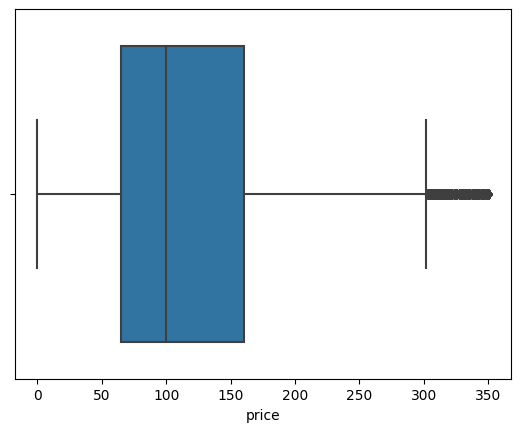

In [84]:
# Visualize the distribution of the target variable
sns.boxplot(x=df_cleaned['price'])
plt.show()

threshold = 300
df_no_outliers = df_cleaned[df_cleaned['price'] < 150]


In [85]:
# One-hot encode categorical variables
df_no_outliers = pd.get_dummies(df_cleaned, columns=['neighbourhood_group', 'room_type'], drop_first=True)

# Display the first few rows of the DataFrame after one-hot encoding
print("DataFrame after one-hot encoding:")
print(df_no_outliers.head())

# Assuming 'price' is the column containing prices in your DataFrame
highest_price = df_no_outliers['price'].max()

print("Highest Price in the Dataset:", highest_price)




DataFrame after one-hot encoding:
   latitude  longitude  price  minimum_nights  number_of_reviews  \
0  40.64749  -73.97237    149               1                  9   
1  40.75362  -73.98377    225               1                 45   
2  40.80902  -73.94190    150               3                  0   
3  40.68514  -73.95976     89               1                270   
4  40.79851  -73.94399     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0            0.21000                               6               365   
1            0.38000                               2               355   
2            1.37757                               1               365   
3            4.64000                               1               194   
4            0.10000                               1                 0   

   neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
0                             1               

In [86]:
# Split the data into features (X) and target variable (y)
X = df_no_outliers.drop('price', axis=1)  # Features (independent variables)
y = df_no_outliers['price']  # Target variable (dependent variable)


# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)

In [87]:


# Build a price prediction model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("R-squared Score:", r2)

R-squared Score: 0.47072899206883134


In [88]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats  # Add this line to import stats


# Split the data into features (X) and target variable (y)
X = df_no_outliers.drop('price', axis=1)  # Features (independent variables)
y = df_no_outliers['price']  # Target variable (dependent variable)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)

# Hyperparameter tuning using Randomized Search
param_dist = {
    'learning_rate': stats.uniform(0.01, 0.2),
    'max_depth': stats.randint(3, 8),
    'n_estimators': stats.randint(50, 151),
    'subsample': stats.uniform(0.8, 0.2)
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)

best_params_random = random_search.best_params_
print("Best Hyperparameters (Randomized Search):", best_params_random)

#  Randomized Search
best_xgb_model_random = random_search.best_estimator_

# Make predictions on the test set
y_pred_xgb_random = best_xgb_model_random.predict(X_test)

# Evaluate the model
mse_xgb_random = mean_squared_error(y_test, y_pred_xgb_random)
r2_xgb_random = r2_score(y_test, y_pred_xgb_random)

print("Tuned XGBoost (Randomized Search) - R-squared Score:", r2_xgb_random)


Best Hyperparameters (Randomized Search): {'learning_rate': 0.12399814593727274, 'max_depth': 5, 'n_estimators': 142, 'subsample': 0.876086753299685}
Tuned XGBoost (Randomized Search) - R-squared Score: 0.5779314798547526
